# Lab 05 - Part 2

### Sudarsan Haridas

### 300353099

**LOAD THE PYTHON LIBRARIES**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report

#import and load the necessary libraries...

2023-08-08 22:27:45.284936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**READ THE DATA**

In [2]:
df = pd.read_csv('Lab5_user_behaviour.csv')

df_copy = df.copy()

#reading the data and creating a copy of the original...

In [3]:
df.head()

#peeking into the data...

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,7.010387,0.419355,31.0,13040,default,1,1,13,E,1
1,51.419393,0.252336,107.0,330113,default,1,1,27,E,1
2,25.860775,0.275000,40.0,62066,default,1,1,11,E,1
3,0.205909,0.818182,11.0,136,default,1,1,9,E,1
4,0.122125,0.812500,16.0,118,default,1,1,13,E,1


In [4]:
df.classification.value_counts()

#check unique values and value counts of target...

1    24734
0    10052
2     1309
3       22
Name: classification, dtype: int64

**DROP THE UNNEEDED DATA**

In [5]:
df.info()

#To check data type and number of null values in each column..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36117 entries, 0 to 36116
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  36117 non-null  float64
 1   api_access_uniqueness           36117 non-null  float64
 2   sequence_length(count)          36117 non-null  float64
 3   vsession_duration(min)          36117 non-null  int64  
 4   ip_type                         36117 non-null  object 
 5   num_sessions                    36117 non-null  int64  
 6   num_users                       36117 non-null  int64  
 7   num_unique_apis                 36117 non-null  int64  
 8   source                          36117 non-null  object 
 9   classification                  36117 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ MB


    - There are no null values to drop...

**CREATE DUMMY VALUES**

In [6]:
df = pd.get_dummies(df, drop_first = True)

#create dummies and drop reference column...

In [7]:
df.head()

#check df...

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis,classification,ip_type_default,ip_type_google_bot,ip_type_private_ip,source_F
0,7.010387,0.419355,31.0,13040,1,1,13,1,1,0,0,0
1,51.419393,0.252336,107.0,330113,1,1,27,1,1,0,0,0
2,25.860775,0.275000,40.0,62066,1,1,11,1,1,0,0,0
3,0.205909,0.818182,11.0,136,1,1,9,1,1,0,0,0
4,0.122125,0.812500,16.0,118,1,1,13,1,1,0,0,0


**PREPARE FEATURES AND TARGET VARIABLE**

In [8]:
target = df.classification

features = df.drop('classification', axis = 1)

#split features and target...

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 99)

#split training and testing data with 25% of data as test data...

**PREPARE NORMALIZATION LAYER**

In [10]:
norm_layer = layers.Normalization(axis = -1)

norm_layer.adapt(x_train)

#create a normalization layer and train with training data...

**DNN SEQUENTIAL MODEL**

In [11]:
dnn_seq_model = keras.Sequential(
[
    norm_layer,
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),    
    layers.Dense(4, activation = 'softmax')
]
)

#create a DNN model as specified..

**COMPILE THE MODEL AND DISPLAY SUMMARY**

In [12]:
dnn_seq_model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

#compile the model...

In [13]:
dnn_seq_model.summary()

#summary of the model...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 11)                23        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                        

**FIT, EVALUATE AND PLOT THE EPOCH ACCURACY**

    - Good number for epochs to start is 3x number of columns in the dataset...
    - if model accuracy is increasing, increase epochs...

In [14]:
dnn_seq_model_data = dnn_seq_model.fit(x_train, y_train, epochs = 40, validation_split = 0.3, batch_size = 100)

#fit the dnn model

Epoch 1/40
203/203 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8524 - val_loss: 0.2631 - val_accuracy: 0.8972
Epoch 2/40
203/203 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9021 - val_loss: 0.2262 - val_accuracy: 0.9219
Epoch 3/40
203/203 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9304 - val_loss: 0.2305 - val_accuracy: 0.9128
Epoch 4/40
203/203 [==============================] - 1s 2ms/step - loss: 0.1553 - accuracy: 0.9448 - val_loss: 0.2271 - val_accuracy: 0.9260
Epoch 5/40
203/203 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9532 - val_loss: 0.2216 - val_accuracy: 0.9317
Epoch 6/40
203/203 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9572 - val_loss: 0.1643 - val_accuracy: 0.9655
Epoch 7/40
203/203 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9601 - val_loss: 0.1758 - val_accuracy: 0.9615
Epoch 

    - The model has attained a good accuracy score...

In [15]:
dnn_seq_model.evaluate(x_test, y_test)

#evaluate the model with test data...

226/226 [==============================] - 0s 842us/step - loss: 0.0625 - accuracy: 0.9827


[0.06251955777406693, 0.9826965928077698]

Text(0.5, 1.0, 'Increase in Accuracy score')

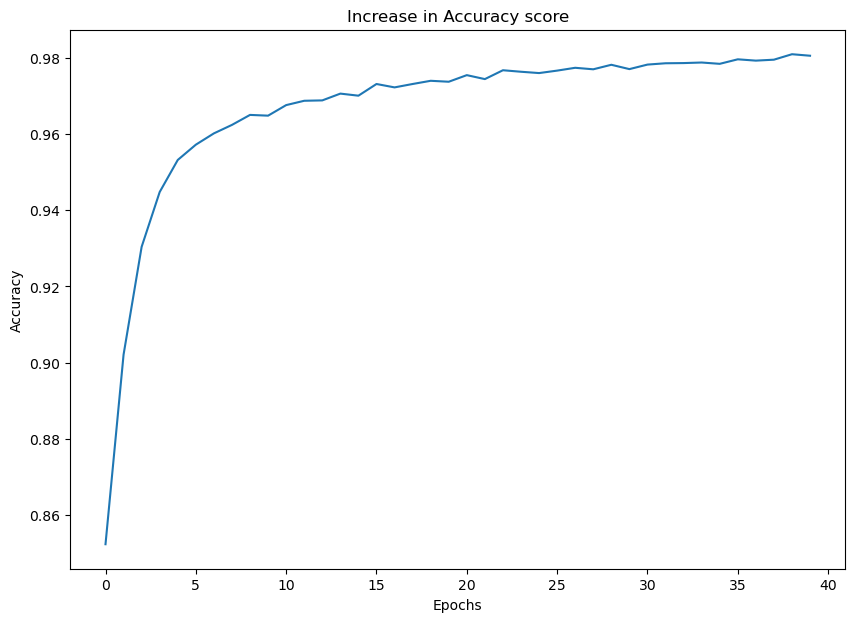

In [16]:
plt.figure(figsize = (10,7))
plt.plot(dnn_seq_model_data.history['accuracy'], label = 'Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy score')

#Plot epoch accuracy of model..

**MAKE PREDICTTION, PLOT CONFUSION MATRIX AND PROVIDE CLASSIFICATION REPORT**

In [17]:
y_pred = np.argmax(dnn_seq_model.predict(x_test), axis = 1)

#predict using the model...
#argmax as 'softmax' activation in output layer provides probability of a class and not class...

226/226 [==============================] - 0s 744us/step


<Axes: xlabel='Predicted Class', ylabel='Actual Class'>

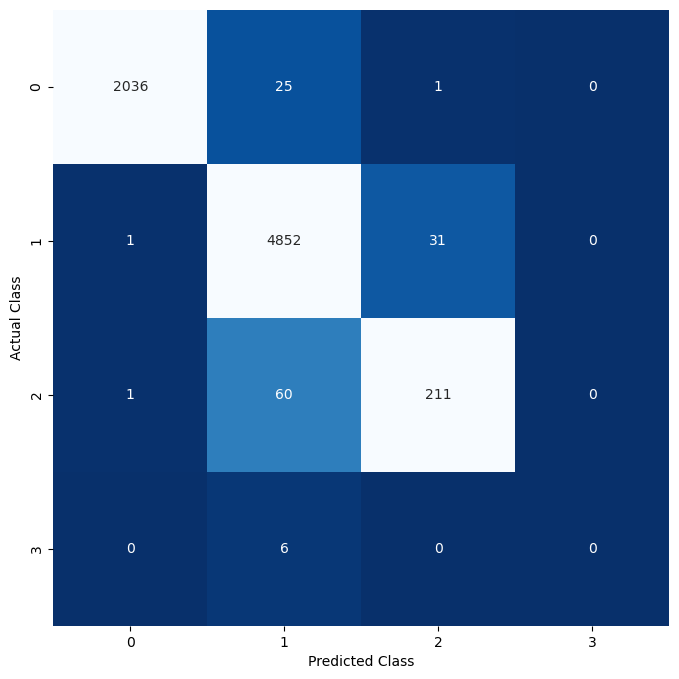

In [18]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                                  columns = np.unique(y_test),
                                  index = np.unique(y_test))

confusion_matrix_df.index.name = 'Actual Class'
confusion_matrix_df.columns.name = 'Predicted Class'

plt.figure(figsize = (8,8))

sns.heatmap(confusion_matrix_df, annot = True, square = True,
            vmax = 200, cbar = False, fmt = "d", cmap = 'Blues_r')

#create a dataframe with confusion matrix...
#Plot a heatmap to visualize it...

In [19]:
confusion_matrix_df

Predicted Class,0,1,2,3
Actual Class,,,,
0,2036,25,1,0
1,1,4852,31,0
2,1,60,211,0
3,0,6,0,0


In [20]:
print(classification_report(y_test, y_pred, zero_division = 0))

#classification report...

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2062
           1       0.98      0.99      0.99      4884
           2       0.87      0.78      0.82       272
           3       0.00      0.00      0.00         6

    accuracy                           0.98      7224
   macro avg       0.71      0.69      0.70      7224
weighted avg       0.98      0.98      0.98      7224

